# Benchmarking Bilby on NERSC using `bilby_pipe`

We require simulations of GW events of two classes: binary-black holes (BBHs), and neutron-star black-hole (NSBH) mergers.

First we present the benchmarking of the MCMC sampler. Next, we present the results of that sampler configuration on a low SNR BBH event to benchmark the 'worst-case' scenario. Next, we present the results of the optimal sampler configuration on a low SNR NSBH event, again to benchmark the 'worst-case' scenario. Finally, we compute the node-hour request based on the previous results.

## Here, we have the results for the same sampler settings, and different algorithms.

From private communication with Nikhil Sarin, developer of bilby

```
No, I think that it's not even sampler settings really. Like this probably depends very strongly on the algorithm e.g., rejection sampling vs rwalk and stuff like that.
```

Below we show the results of a debug job that ran for 30 minutes. `bilby_pipe` jobs are split into four steps, with the second step being the most computationally intensive (running the MCMC chains). All of the 30 minute debug jobs were unable to complete the second step and ran until timeout.

The jobs were ran with all other parameters identical, using the same gravitational wave event. This event has a network SNR of 9, which is the minimum for usage in our studies. Higher SNR will converge faster, and therefore be computationally less expensive. Therefore, this represents a worst-case event for our studies.

Below we present the `seff` results for step 2 of the full job submission, since step 2 is the most computationally expensive. In all cases, we used one node, with 256 CPUs and GB of memory.

#### Plotting tools for results

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
algorithms = [
    "act-walk",
    "unif",
    "acceptance-walk",
    "rwalk",
    "slice",
    "rslice",
    "hslice",
    "rwalk_dynesty",
]  # Algorithm name
cpu = [
    18.96,
    9.65,
    44.61,
    0.52,
    7.75,
    26.42,
    53.59,
    24.55,
]  # CPU efficiency [%]
memory = [
    99.72,
    50.79,
    55.33,
    56.85,
    50.18,
    45.36,
    48.89,
    57.44,
]  # Memory efficiency [%]
jobIDs = [
    37802468,
    37872626,
    37870741,
    37873698,
    37874103,
    37874301,
    37874598,
    37874646,
]  # The jobIDs
color = ["red"] * 4 + ["blue"] * 2 + ["red"] + ["blue"]

### Results

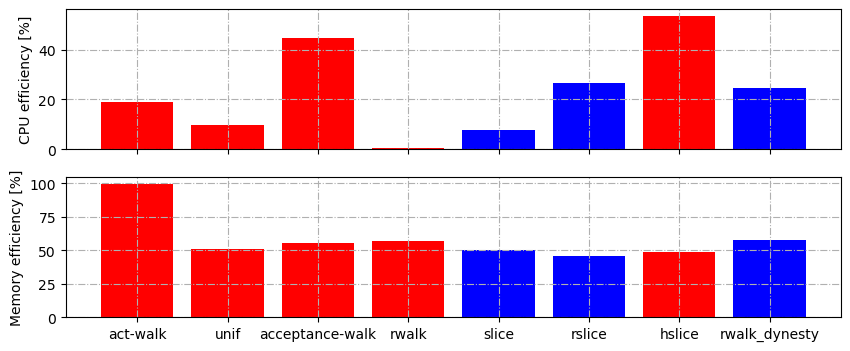

In [14]:
fig, axs = plt.subplots(2, 1, figsize=[10, 4], sharex=True)

axs[0].bar(algorithms, cpu, color=color)
axs[0].set_ylabel("CPU efficiency [%]")


axs[1].bar(algorithms, memory, color=color)
axs[1].set_ylabel("Memory efficiency [%]")

for ax in axs:
    ax.grid(ls="-.")

## Based on the above, we find the `hslice` and `acceptance-walk` samplers algorithm is the most CPU-efficient.

# Here, we provide the results from a production level job that ran to completion using the `acceptance-walk` and `hslice` sampler algorithms. 

Here we provide the results from the compute heavy job only. The other jobs were identical and did not depend on the sampler method

##### `acceptance-walk`

```Job ID: 37945469

Cluster: perlmutter

User/Group: seanmacb/seanmacb

State: COMPLETED (exit code 0)

Nodes: 1

Cores per node: 256

CPU Utilized: 2-11:27:32

CPU Efficiency: 48.11% of 5-03:35:28 core-walltime

Job Wall-clock time: 00:28:58

Memory Utilized: 3.99 GB

Memory Efficiency: 49.91% of 8.00 GB (8.00 GB/node)

##### `hslice`

```Job ID: 37945213

Cluster: perlmutter

User/Group: seanmacb/seanmacb

State: COMPLETED (exit code 0)

Nodes: 1

Cores per node: 256

CPU Utilized: 9-17:34:38

CPU Efficiency: 57.39% of 16-22:58:08 core-walltime

Job Wall-clock time: 01:35:23

Memory Utilized: 4.13 GB

Memory Efficiency: 51.68% of 8.00 GB (8.00 GB/node)```

#### The results of the above chains show that `acceptance-walk` is the more efficient sampler, using less node-hours at comparable efficiency to `hslice`

## Here, we provide the full results of a full production job using sampler parameters identical to LVK's analysis pipelines, on a low SNR BBH event

The main change is to the sampler parameters, which now use 

`sampler-kwargs = {'naccept': 60, 'nlive': 500, 'bound': 'live-multi', 'sample': 'acceptance-walk','walks': 100, 'dlogz': 0.1}`

For the gravitational wave injection, we selected the lowest mass BBH injection from our mock compact binary coalescence catalog. This injection has an SNR of 9.6, and a chirp mass of 25 solar masses. This is once again a worst-case estimate.

```Job ID: 37989765
Cluster: perlmutter
User/Group: seanmacb/seanmacb
State: COMPLETED (exit code 0)
Nodes: 1
Cores per node: 256
CPU Utilized: 1-03:00:23
CPU Efficiency: 41.15% of 2-17:38:08 core-walltime
Job Wall-clock time: 00:15:23
Memory Utilized: 3.70 GB
Memory Efficiency: 46.30% of 8.00 GB (8.00 GB/node)

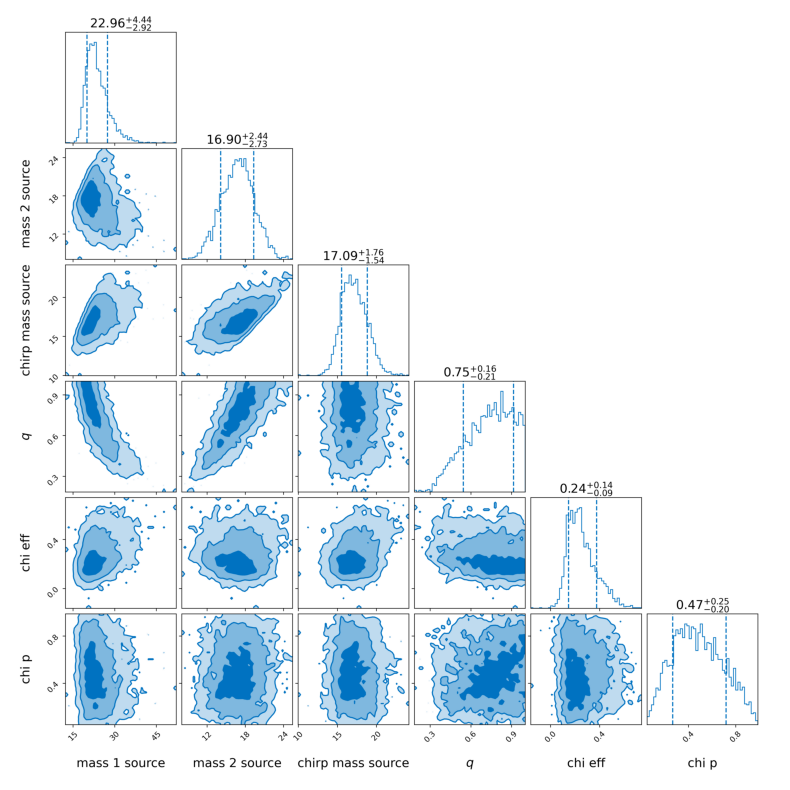

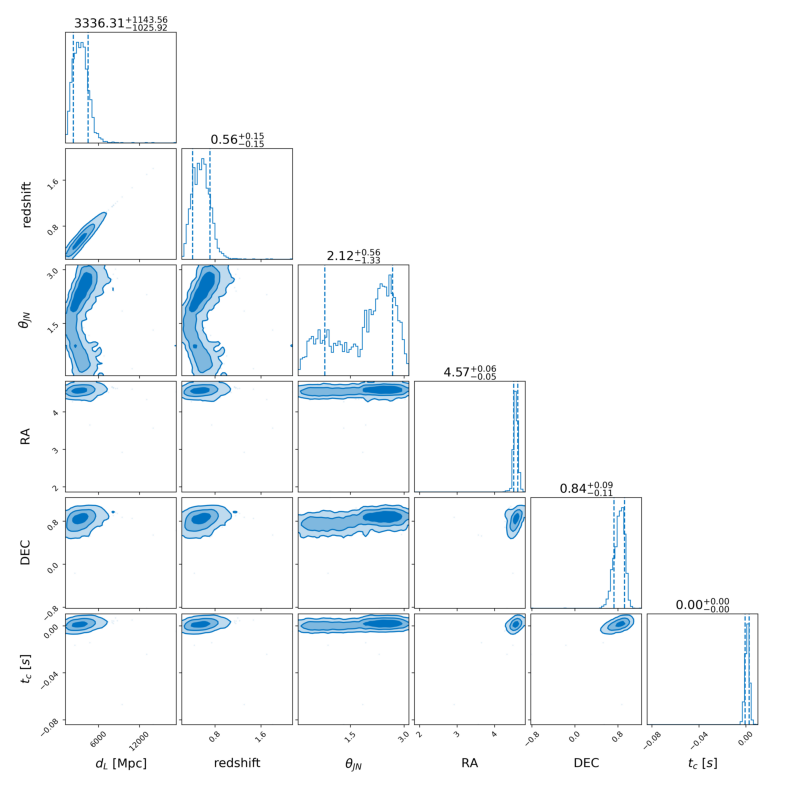

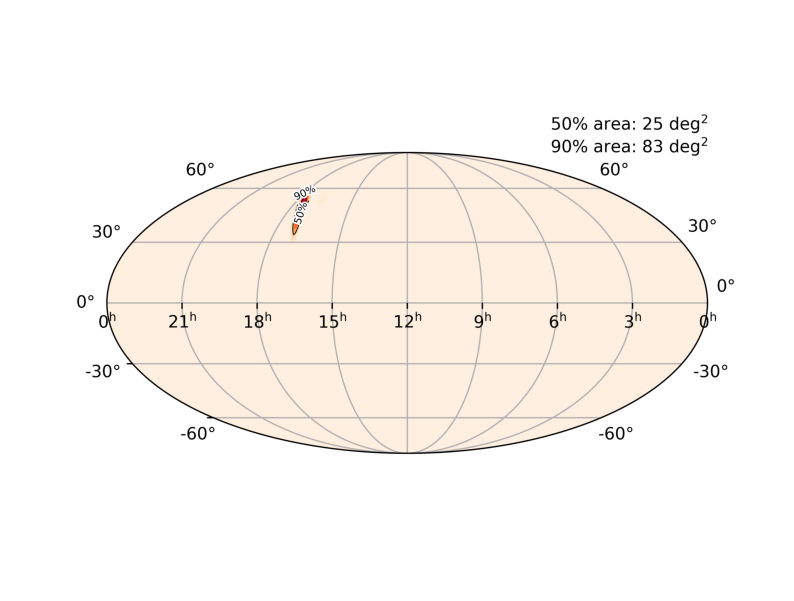

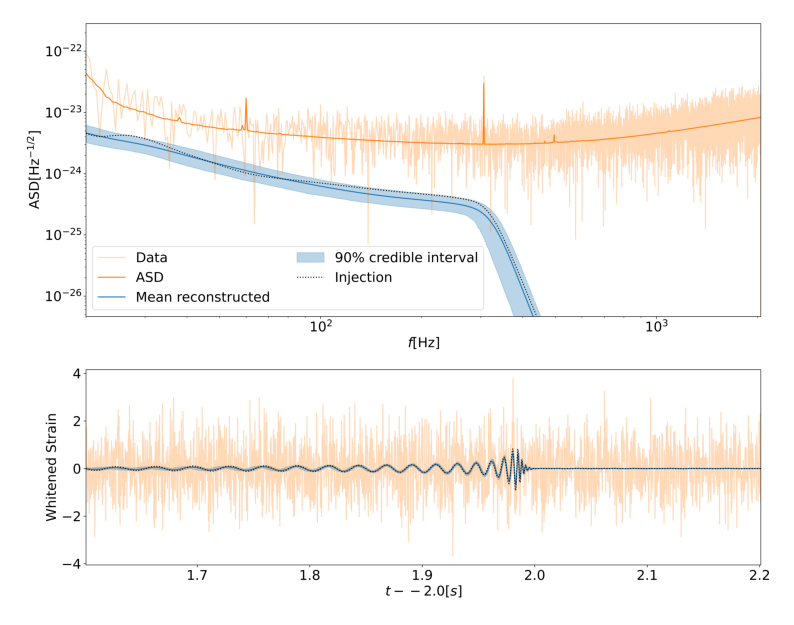

In [11]:
fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results/bbh_injection_10198000084760_1_data0_0_analysis_H1L1V1_intrinsic_corner.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results/bbh_injection_10198000084760_1_data0_0_analysis_H1L1V1_extrinsic_corner.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results/bbh_injection_10198000084760_1_data0_0_analysis_H1L1V1_skymap.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results/bbh_injection_10198000084760_1_data0_0_analysis_H1L1V1_H1_waveform.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

Accounting for overhead and MCMC-chain convergence volatility, we estimate one BBH GW event should run to completion in 0.5 node hours

## The above is for a binary-black hole GW event, which is one class of dark sirens. Another class of dark sirens are neutron-star black-hole GW events

For NSBH events, we use the same sampler configuration but different priors to account for the neutron star component of the merger.

Notably, NSBH events that are meaningful for cosmological analyses have an SNR > 8, lower than the BBH threshold (SNR>9) {[Reference](https://arxiv.org/pdf/2108.07277)}.

Below, we provide the injection parameters of an NSBH event with low SNR (8.09).

```
'mass_ratio': 0.26,
'chirp_mass': 7.2,
'luminosity_distance': 370,
'dec': -0.02197253529331194,
'ra': 6.245654743639807,
'theta_jn': 2.143568928316933,
'psi': 0.3475727048405651,
'phase': 5.289066413392528,
'a_1': 0.2558662451290839,
'a_2': 0.9081357648036922,
'tilt_1': 0.3992353586029111,
'tilt_2': 0.6291964352671728,
'phi_12': 1.5210838860047768,
'phi_jl': 1.0295854881909194,
'geocent_time': 0

For this GW injection, we use the same sampler parameters. 

One notable difference in the GW waveform is the duration, which has increased from 4s to 32s. This is computed using a bilby function: `bilby.gw.utils.calculate_time_to_merger(frequency, mass_1, mass_2)`. The masses are drawn directly from the low SNR injection parameters, the frequency is set to $20Hz$, which is the typical noise floor of the LVK interferometers.

Since we are selecting for a low SNR event above the SNR floor, this is once again a worst-case estimate.

```

Job ID: 38172158
Cluster: perlmutter
User/Group: seanmacb/seanmacb
State: COMPLETED (exit code 0)
Nodes: 1
Cores per node: 256
CPU Utilized: 62-05:31:19
CPU Efficiency: 61.84% of 100-15:13:04 core-walltime
Job Wall-clock time: 09:26:04
Memory Utilized: 6.79 GB
Memory Efficiency: 84.89% of 8.00 GB (8.00 GB/node)

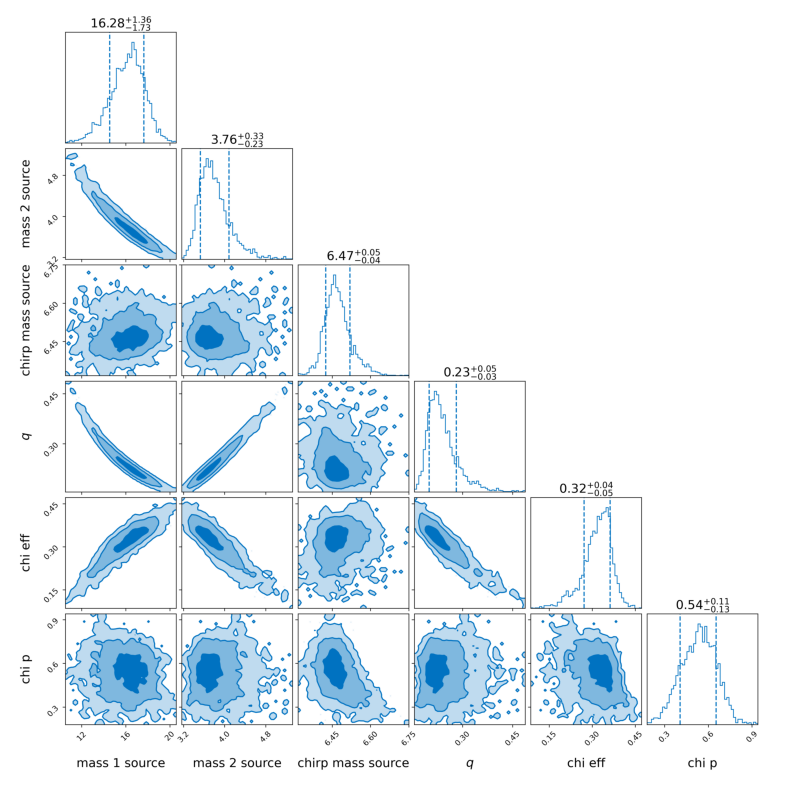

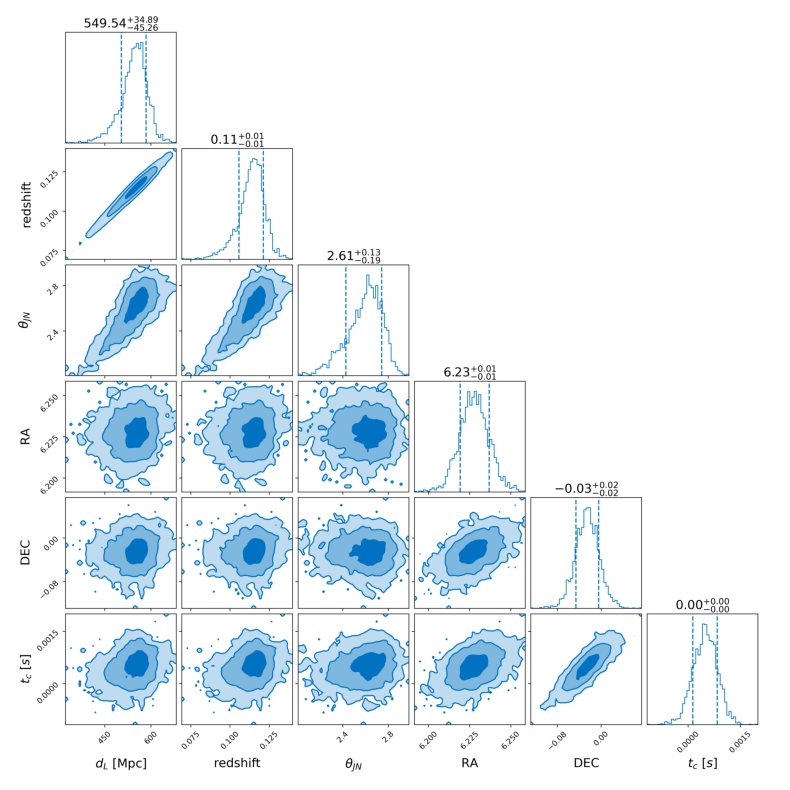

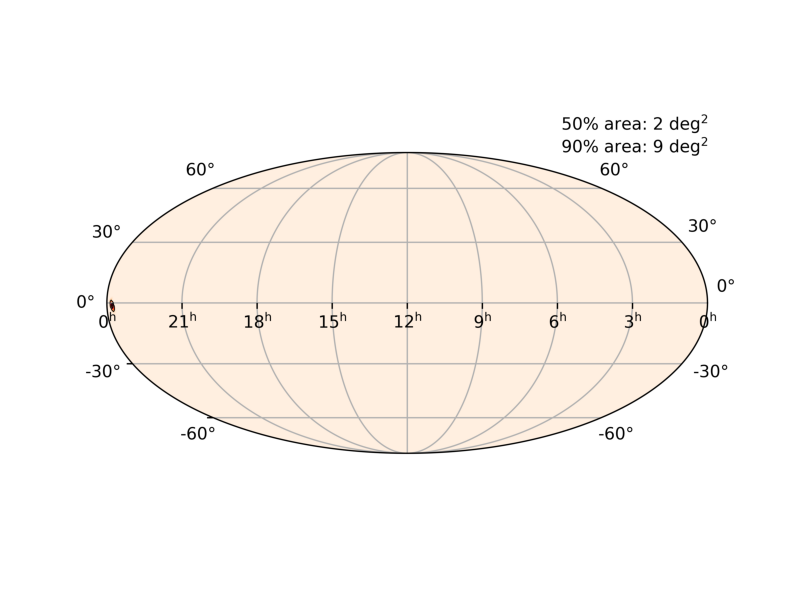

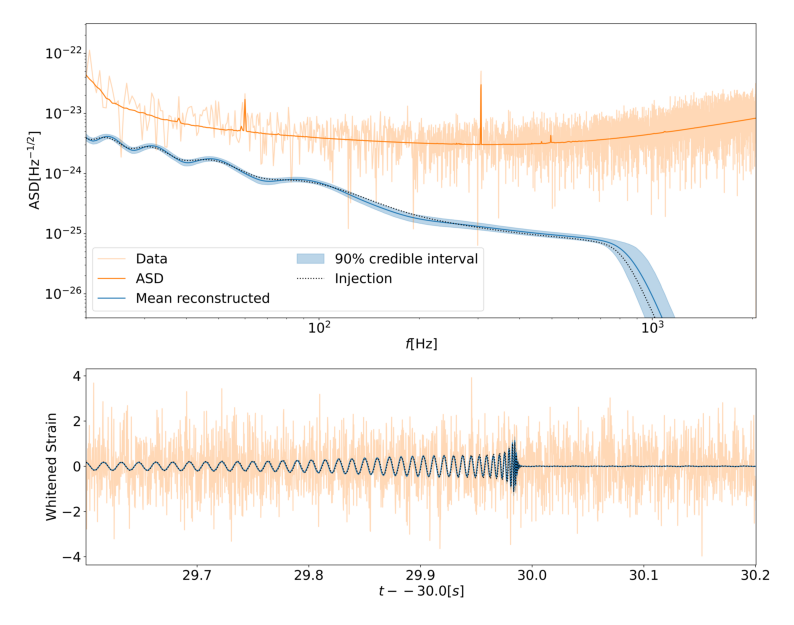

In [12]:
fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results2/nsbh_injection_1_data0_0_analysis_H1L1V1_intrinsic_corner.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread(
    "results2/nsbh_injection_1_data0_0_analysis_H1L1V1_extrinsic_corner.png"
)
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread("results2/nsbh_injection_1_data0_0_analysis_H1L1V1_skymap.png")
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

fig, ax = plt.subplots(figsize=[10, 10])
img = mpimg.imread("results2/nsbh_injection_1_data0_0_analysis_H1L1V1_H1_waveform.png")
imgplot = ax.imshow(img)
ax.set_axis_off()
fig.show()

Accounting for overhead and MCMC-chain convergence volatility, we estimate one NSBH GW event should run to completion in 10 node hours

## Different conditions to be tested

We will test the impact of different cosmology/galaxy catalog conditions. For each different condition we will use a 'batch' of GW events, set to mimic the approximate amount of GW events in final LVK O1-O4 dataset. This totals to 300 BBH's and 10 NSBH's per batch.

We want to test 11 different conditions on cosmological analysis, which will require 11 different batches of gw events
- Uniform weighting, fiducial cosmology
- Uniform weighting, skewed cosmology
- SFR/Stellar mass weighting
- Luminosity weighting
- GW host outside of galaxy catalog, GW localization volume inside of catalog footprint
- GW host inside of galaxy catalog, GW localization volume inside of catalog footprint
- GW host inside of galaxy catalog, GW localization volume partially outside of catalog footprint
- Photo-z precision affect on cosmological weighting (2 scenarios)
- Photometric completeness effects (2 scenarios)

For 11 batches of GW events, that comes out to 3,300 BBHs and 110 NSBH events.

3,300 BBH events * 0.5 node hours / event = **1,650 node hours**

110 NSBH events * 10 node hours / event = **1,100 node hours**

# In total, our request to complete the simulations to support this analysis is 2,750 CPU node hours

The full `.ini` used to generate the `bilby_pipe` job for the BBH event is attached below

```# Accounting tag
accounting = m1727

# Which detectors to use, option: H1, L1, V1
detectors = [H1, L1, V1]

# The duration of data to analyse in seconds
duration = 4 

# The sampler
sampler = dynesty

# The options to pass to the sampler
sampler-kwargs = {'naccept': 60, 'nlive': 500, 'bound': 'live-multi', 'sample': 'acceptance-walk','walks': 100, 'dlogz': 0.1}

# The prior file to use - modified for wider range of dL's
prior-file = /pscratch/sd/s/seanmacb/gwCosmoDesc/lib/python3.10/site-packages/bilby/gw/prior_files/precessing_spins_bbh_widened.prior

# We want to inject a signal
injection = True

# We want to use Gaussian noise (default is to simulate it from O4-design sensitivity curves) 
gaussian-noise = True

# We'll do just one simulation
n-simulation = 1

# We'll run one "parallel" job. This runs n-parallel *identical* jobs and then combines the results together into a single combined run
n-parallel = 1

# Use parallisation using 4 cores on one node (remove comment to use)
request-cpus = 256

### Added by me

accounting-user = seanmacb
generation-pool=local-pool
conda-env=/pscratch/sd/s/seanmacb/gwCosmoDesc
scheduler-env=/pscratch/sd/s/seanmacb/gwCosmoDesc
scheduler=SLURM
scheduler-analysis-time=48:00:00
# Create traceplots during the run
plot-trace=True
# Create plot of the frequency domain data
plot-data=True
# Create time-domain plot of the injection
plot-injection=True
# Create spectrogram plot
plot-spectrogram=True
# Create calibration posterior plot
plot-calibration=True
# Create intrinsic and extrinsic posterior corner plots
plot-corner=True
# Create 1-d marginal posterior plots
plot-marginal=True
# Create posterior skymap
plot-skymap=True
# Create waveform posterior plot
plot-waveform=True
# Format for making bilby_pipe plots, can be [png, pdf, html]. If specified format is not supported, will default to png.
plot-format=png
# Create a PESummary page
create-summary=False
# Email for notifications
email=sean.macbride@physik.uzh.ch
notification=Complete

scheduler-args= "constraint=cpu qos=regular account=m1727"


# To be filled in later
# A label to help us remember what the job was for
label = bbh_injection_10198000084760_1
# The directory to store results in
outdir = /global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/BBH_GalaxyIDs/testBB_pipe_10198000084760_1
injection_dict = {'mass_ratio': 0.6175035423937371,'chirp_mass': 25.000102659775106,'luminosity_distance': 2345.2702294737624,'dec': 45.49023166610277,'ra': 261.0399557080382,'theta_jn': 0.9956917779551254,'psi': 3.139779711138376,'phase': 0.3950762300423279,'a_1': 0.5241339727848943,'a_2': 0.1953139235937027,'tilt_1': 1.3648741772483712,'tilt_2': 0.3012292456309504,'phi_12': 0.7219597079518022,'phi_jl': 4.899678893226452,'geocent_time': 0} 
# Get this from the CBC catalog

The full `.ini` used to generate the `bilby_pipe` job for the NSBH event is attached below

```
# template taken from https://github.com/GregoryAshton/GWParameterEstimationWorkshop2020/blob/master/pages/getting-started-pipe.md, modified for what we want to do

# The accounting tag, onnly needed on LDG clusters.
# See https://ldas-gridmon.ligo.caltech.edu/accounting/condor_groups/determine_condor_account_group.html
# for help with determining what tag to use
accounting = m1727

# A label to help us remember what the job was for
label = nsbh_injection_1

# The directory to store results in
outdir = /global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/NSBH_GalaxyIDs/prod_0

# Which detectors to use, option: H1, L1, V1
detectors = [H1, L1, V1]

# The duration of data to analyse in seconds
duration = 32

# The sampler
sampler = dynesty

# The options to pass to the sampler
sampler-kwargs = {'naccept': 60, 'nlive': 500, 'bound': 'live-multi', 'sample': 'acceptance-walk','walks': 100, 'dlogz': 0.1}

# The prior file to use - modified for wider range
prior-file = /pscratch/sd/s/seanmacb/gwCosmoDesc/lib/python3.10/site-packages/bilby/gw/prior_files/nsbh_sean.prior 
# THIS IS MODIFIED!!!!!!

# We want to inject a signal
injection = True
injection_dict = {'mass_ratio': 0.26,'chirp_mass': 7.2,'luminosity_distance': 370,'dec': -0.02197253529331194,'ra': 6.245654743639807,'theta_jn': 2.143568928316933,'psi': 0.3475727048405651,'phase': 5.289066413392528,'a_1': 0.2558662451290839,'a_2': 0.9081357648036922,'tilt_1': 0.3992353586029111,'tilt_2': 0.6291964352671728,'phi_12': 1.5210838860047768,'phi_jl': 1.0295854881909194,'geocent_time': 0} 
# Get this from the csv

# We want to use Gaussian noise (default is to simulate it from O4-design sensitivity curves) 
gaussian-noise = True

# We'll do just one simulation
n-simulation = 1

# We'll run one "parallel" job. This runs n-parallel *identical* jobs and then combines the results together into a single combined run
n-parallel = 1

# Use parallisation using 4 cores on one node (remove comment to use)
request-cpus = 256

### Added by me

accounting-user = seanmacb
generation-pool=local-pool
conda-env=/pscratch/sd/s/seanmacb/gwCosmoDesc
scheduler-env=/pscratch/sd/s/seanmacb/gwCosmoDesc
scheduler=SLURM
scheduler-analysis-time=48:00:00
# Create traceplots during the run
plot-trace=True
# Create plot of the frequency domain data
plot-data=True
# Create time-domain plot of the injection
plot-injection=True
# Create spectrogram plot
plot-spectrogram=True
# Create calibration posterior plot
plot-calibration=True
# Create intrinsic and extrinsic posterior corner plots
plot-corner=True
# Create 1-d marginal posterior plots
plot-marginal=True
# Create posterior skymap
plot-skymap=True
# Create waveform posterior plot
plot-waveform=True
# Format for making bilby_pipe plots, can be [png, pdf, html]. If specified format is not supported, will default to png.
plot-format=png
# Create a PESummary page
create-summary=False
# Email for notifications
email=sean.macbride@physik.uzh.ch
notification=Complete

scheduler-args= "constraint=cpu qos=regular account=m1727"
